## 4-1 確率と統計を学ぶ準備

In [3]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第3位まで表示
%precision 3

# ランダムシードの固定
np.random.seed(0)

In [4]:
dice_data = np.array([1, 2, 3, 4, 5, 6])

print("１つだけランダムに抽出:{}".format(np.random.choice(dice_data, 1)))

１つだけランダムに抽出:[5]


In [5]:
calc_steps = 1000

dice_rolls = np.random.choice(dice_data, calc_steps)

for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print("{}が出る確率:{}".format(i, p))

1が出る確率:0.171
2が出る確率:0.158
3が出る確率:0.157
4が出る確率:0.183
5が出る確率:0.16
6が出る確率:0.171


一様分布

[0.181 0.16  0.162 0.162 0.176 0.159]


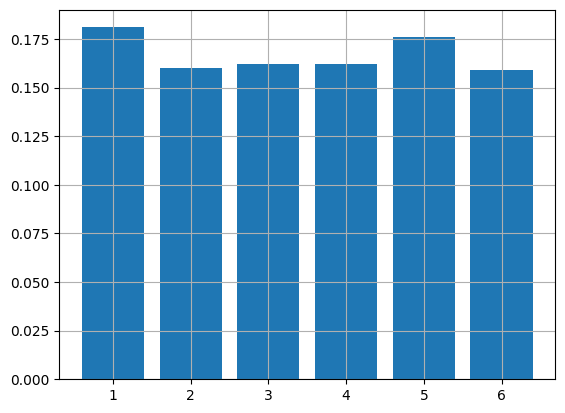

In [23]:
calc_steps = 1000

dice_rolls = np.random.choice(dice_data,calc_steps)

prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)
print(prob_data)

ベルヌーイ分布

In [33]:
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# uniqueで一意な値を抽出
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print("{}が出る確率:{}".format(i, p))
    prob_be_data = np.append(prob_be_data, p)

print(prob_be_data)

0が出る確率:0.625
1が出る確率:0.375
[0.625 0.375]


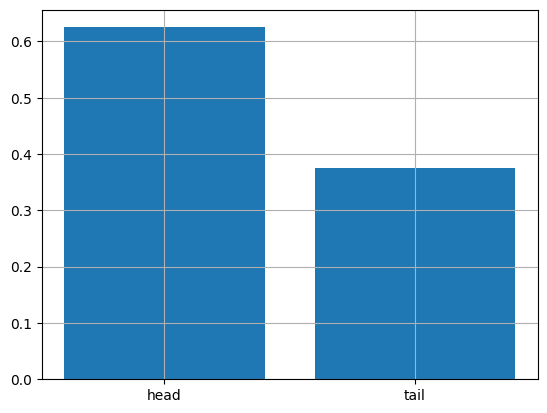

In [69]:
plt.bar([0, 1], prob_be_data, align='center')   
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (4,).

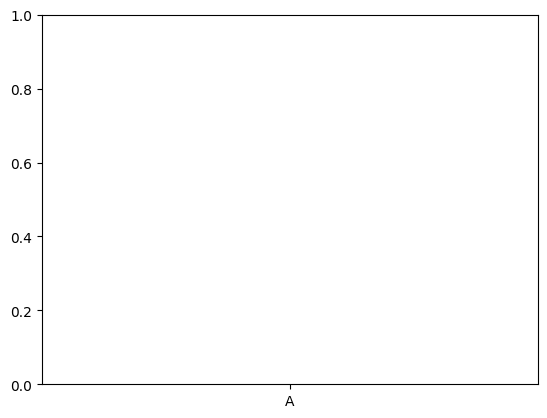

In [71]:
categories = ['A', 'B', 'C']
values = [3, 7, 5, 6]

# 棒グラフの作成
plt.bar(categories, values)

# タイトルとラベルの設定
plt.title('Bar Chart Example')
plt.xlabel('Categories')
plt.ylabel('Values')

# グラフを表示
plt.show()